In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d "altruistdelhite04/loan-prediction-problem-dataset"

  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 6.67MB/s]


In [ ]:
!unzip loan-prediction-problem-dataset.zip -d data/

Archive:  loan-prediction-problem-dataset.zip
  inflating: data/test_Y3wMUE5_7gLdaTN.csv  
  inflating: data/train_u6lujuX_CVtuZ9i.csv  


In [ ]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Library that I need
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#get copy from data 
df  = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

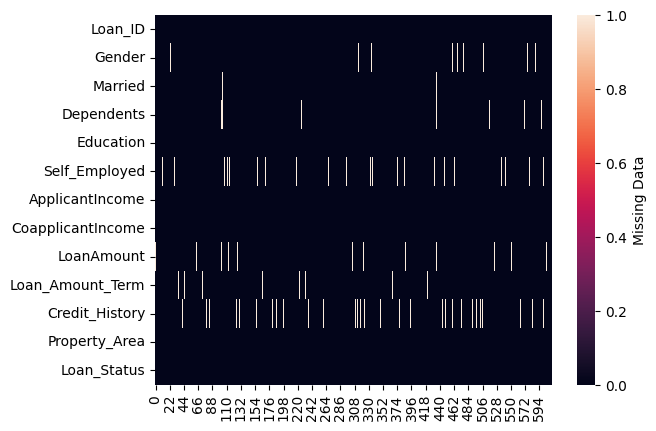

In [ ]:
sns.heatmap(df.isnull().T,cbar_kws={'label': 'Missing Data'})
plt.show()

In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df[['Gender','Loan_Status']].value_counts()

Gender  Loan_Status
Male    Y              339
        N              150
Female  Y               75
        N               37
dtype: int64

In [ ]:
fig = px.histogram(df, x="Gender", color="Loan_Status")
fig.show()

In [ ]:
x=str(df["Gender"].mode().values[0])
df.fillna(x,inplace=True)

In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df["Married"].value_counts()

Yes     398
No      213
Male      3
Name: Married, dtype: int64

In [ ]:
df[df["Married"]=="Male"]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,Male,Male,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,Male,Male,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,Male,Male,Graduate,No,10047,0.0,Male,240.0,1.0,Semiurban,Y


In [ ]:
#i will drop this wrong data
marrid_wrong=df[df["Married"]=="Male"].index.values
df.drop(marrid_wrong,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
607,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
608,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
609,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


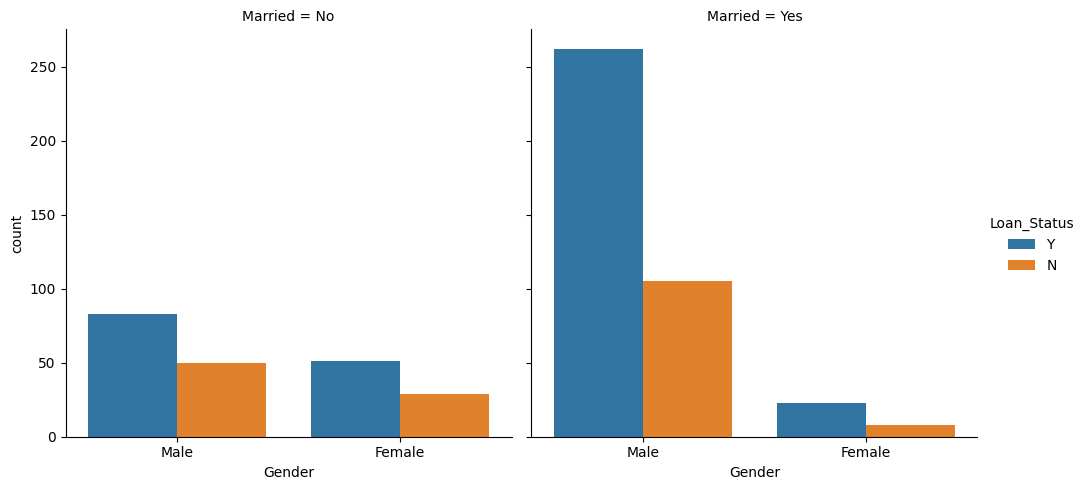

In [ ]:
g = sns.catplot(x='Gender', hue='Loan_Status', col='Married', kind='count', data=df)
plt.show()

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Dependents'].value_counts()

0       345
1       102
2       101
3+       51
Male     12
Name: Dependents, dtype: int64

In [ ]:
df[df['Dependents']=="Male"]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,Male,Graduate,No,13650,0.0,Male,360.0,1.0,Urban,Y
120,Male,Yes,Male,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,Male,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
293,Female,No,Male,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,Male,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,Male,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,Male,Graduate,Yes,5503,4490.0,70.0,Male,1.0,Semiurban,Y
346,Male,Yes,Male,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
355,Female,No,Male,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
517,Male,Yes,Male,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


In [ ]:
depnd=int(df['Dependents'].mode())
depnd

0

In [ ]:
def get_Dependents(inp):
    if inp =="Male":
        return depnd
    elif inp == "3+" :
        return 3
    else :
        return int(inp)

In [ ]:
df['Dependents']=df['Dependents'].apply(get_Dependents)

In [ ]:
df['Dependents'].value_counts()

0    357
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        477
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No      497
Yes      82
Male     32
Name: Self_Employed, dtype: int64

In [ ]:
df.drop(df[df['Self_Employed']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
574,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
575,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
576,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
577,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome
count,579.000000,579.000000,579.000000
mean,0.751295,5373.886010,1576.599171
std,1.013906,5775.117538,2491.340803
min,0.000000,150.000000,0.000000
25%,0.000000,2875.500000,0.000000
50%,0.000000,3833.000000,1167.000000
75%,1.500000,5818.500000,2279.000000
max,3.000000,81000.000000,33837.000000


In [ ]:
df['CoapplicantIncome'].describe()

count      579.000000
mean      1576.599171
std       2491.340803
min          0.000000
25%          0.000000
50%       1167.000000
75%       2279.000000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

In [ ]:
df.drop(df[df['LoanAmount']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
554,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
555,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
556,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
557,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop(df[df['Credit_History']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
510,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
511,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
512,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
513,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop(df[df['Loan_Amount_Term']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
497,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
498,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
499,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
500,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.select_dtypes(include="O")

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,187.0,360.0,1.0,Urban,Y


In [ ]:
df['LoanAmount']=df['LoanAmount'].apply(lambda a : int(a))

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(lambda a : int(a))

In [ ]:
df['Credit_History']=df['Credit_History'].apply(lambda a : int(a))

In [ ]:
df.select_dtypes(include="O")

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
5,Male,Yes,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


In [ ]:
dataencoded=pd.get_dummies(df[['Gender','Married','Education','Self_Employed']])
dataencoded.reset_index(drop=True)
dataencoded

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,0,1,0,1,1,0,1,0
2,0,1,0,1,1,0,0,1
3,0,1,0,1,0,1,1,0
4,0,1,1,0,1,0,1,0
5,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0
610,0,1,0,1,1,0,1,0
611,0,1,0,1,1,0,1,0
612,0,1,0,1,1,0,1,0


In [ ]:
df = pd.concat([df,dataencoded],axis=1)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,0,1,0,1,1,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,0,1,0,1,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,0,1,0,1,0,1,1,0
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,0,1,1,0,1,0,1,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y,1,0,1,0,1,0,1,0
610,Male,Yes,3,Graduate,No,4106,0.0,40,180,1,Rural,Y,0,1,0,1,1,0,1,0
611,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y,0,1,0,1,1,0,1,0
612,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y,0,1,0,1,1,0,1,0


In [ ]:
df.drop(['Gender','Married','Education','Self_Employed'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Dependents                0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Gender_Female             0
Gender_Male               0
Married_No                0
Married_Yes               0
Education_Graduate        0
Education_Not Graduate    0
Self_Employed_No          0
Self_Employed_Yes         0
dtype: int64

In [ ]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,1,4583,1508.0,128,360,1,Rural,N,0,1,0,1,1,0,1,0
2,0,3000,0.0,66,360,1,Urban,Y,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120,360,1,Urban,Y,0,1,0,1,0,1,1,0
4,0,6000,0.0,141,360,1,Urban,Y,0,1,1,0,1,0,1,0
5,2,5417,4196.0,267,360,1,Urban,Y,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71,360,1,Rural,Y,1,0,1,0,1,0,1,0
610,3,4106,0.0,40,180,1,Rural,Y,0,1,0,1,1,0,1,0
611,1,8072,240.0,253,360,1,Urban,Y,0,1,0,1,1,0,1,0
612,2,7583,0.0,187,360,1,Urban,Y,0,1,0,1,1,0,1,0


In [ ]:
encoder= ce.OneHotEncoder(cols=['Property_Area'],return_df=True)
data_encoded=encoder.fit_transform(df['Property_Area']) 
data_encoded

,Property_Area_1,Property_Area_2,Property_Area_3
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
609,1,0,0
610,1,0,0
611,0,1,0
612,0,1,0


In [ ]:
df = pd.concat([df,data_encoded],axis=1)

In [ ]:
df.drop('Property_Area',axis=1,inplace=True)

In [ ]:
df.reset_index(drop=True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_1,Property_Area_2,Property_Area_3
0,1,4583,1508.0,128,360,1,N,0,1,0,1,1,0,1,0,1,0,0
1,0,3000,0.0,66,360,1,Y,0,1,0,1,1,0,0,1,0,1,0
2,0,2583,2358.0,120,360,1,Y,0,1,0,1,0,1,1,0,0,1,0
3,0,6000,0.0,141,360,1,Y,0,1,1,0,1,0,1,0,0,1,0
4,2,5417,4196.0,267,360,1,Y,0,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0,2900,0.0,71,360,1,Y,1,0,1,0,1,0,1,0,1,0,0
498,3,4106,0.0,40,180,1,Y,0,1,0,1,1,0,1,0,1,0,0
499,1,8072,240.0,253,360,1,Y,0,1,0,1,1,0,1,0,0,1,0
500,2,7583,0.0,187,360,1,Y,0,1,0,1,1,0,1,0,0,1,0


In [ ]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 502, dtype: object

In [ ]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_1,Property_Area_2,Property_Area_3
1,1,4583,1508.0,128,360,1,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66,360,1,0,1,0,1,1,0,0,1,0,1,0
3,0,2583,2358.0,120,360,1,0,1,0,1,0,1,1,0,0,1,0
4,0,6000,0.0,141,360,1,0,1,1,0,1,0,1,0,0,1,0
5,2,5417,4196.0,267,360,1,0,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71,360,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40,180,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253,360,1,0,1,0,1,1,0,1,0,0,1,0
612,2,7583,0.0,187,360,1,0,1,0,1,1,0,1,0,0,1,0


In [ ]:
X.shape


(502, 17)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [ ]:
logistic_model0=LogisticRegression()

In [ ]:
logistic_model0.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logistic_model0.predict(x_test)

In [ ]:
print("Accuracy ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy  84.15841584158416 %


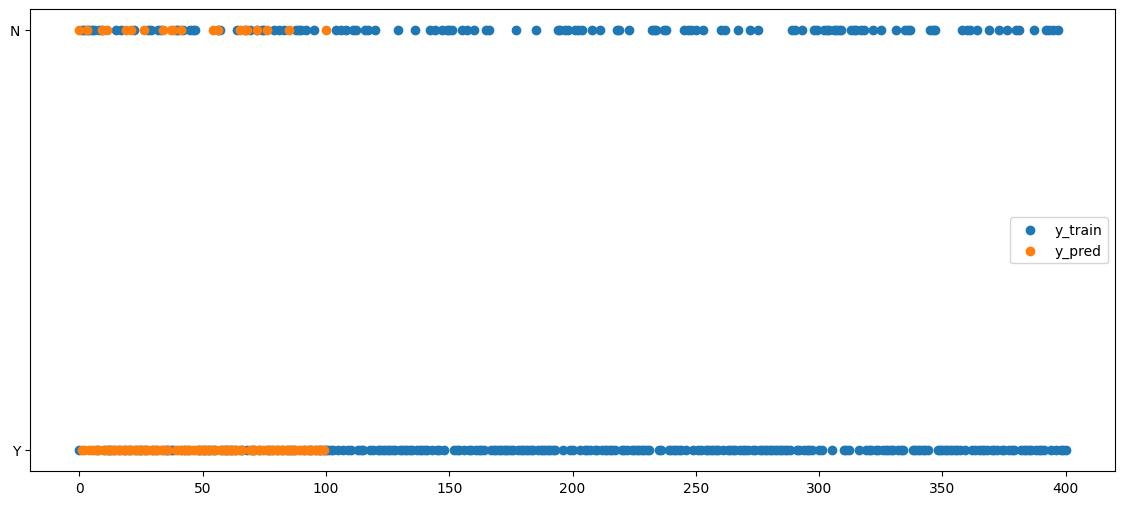

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(range(len(y_train)), y_train, label='y_train')
plt.scatter(range(len(y_pred)), y_pred, label='y_pred')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.90      0.56      0.69        32
           Y       0.83      0.97      0.89        69

    accuracy                           0.84       101
   macro avg       0.86      0.77      0.79       101
weighted avg       0.85      0.84      0.83       101



In [ ]:
px.imshow(confusion_matrix(y_test,y_pred),text_auto=True)

KNN:


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)



In [ ]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [ ]:

knn.score(x_train , y_train )


0.8104738154613467

In [ ]:
knn.score(x_test , y_test )

0.7227722772277227

In [ ]:
y_pred1=knn.predict(x_test)

In [ ]:
print("Accuracy ",accuracy_score(y_test,y_pred1)*100,"%")

Accuracy  72.27722772277228 %


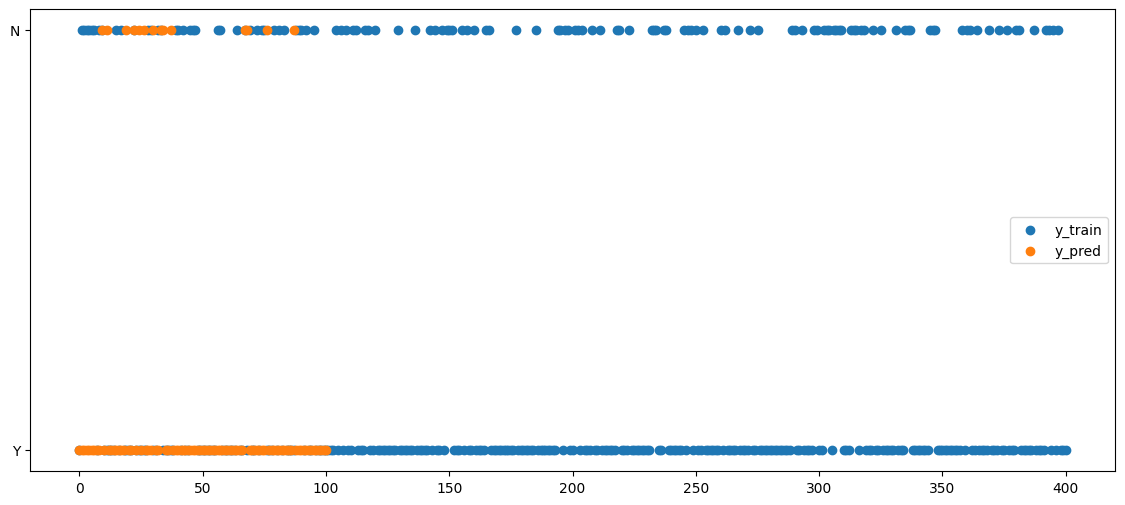

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(range(len(y_train)), y_train, label='y_train')
plt.scatter(range(len(y_pred1)), y_pred1, label='y_pred')
plt.legend()
plt.show()

Decision Tree :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier( max_depth= 2 , max_features= 17,min_samples_leaf=3)

In [ ]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2, max_features=17, min_samples_leaf=3)

In [ ]:
dt.score(x_train , y_train)

0.8029925187032418

In [ ]:
dt.score(x_test , y_test)

0.8415841584158416

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print("Accuracy ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy  84.15841584158416 %


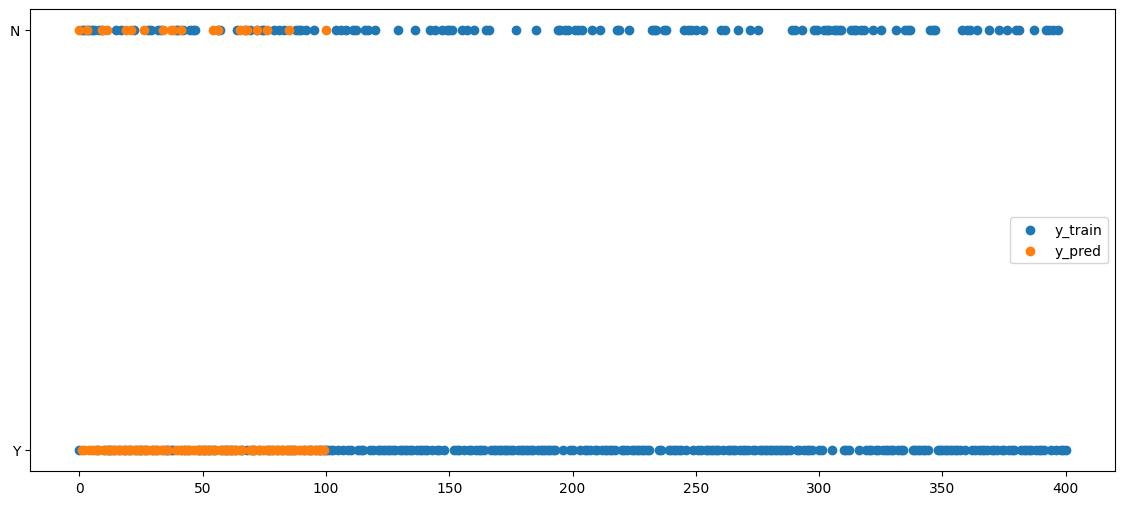

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(range(len(y_train)), y_train, label='y_train')
plt.scatter(range(len(y_pred)), y_pred, label='y_pred')
plt.legend()
plt.show()

RandomForest :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators= 10 , max_depth=2 ,max_features=17)

In [ ]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=2, max_features=17, n_estimators=10)

In [ ]:
rf.score(x_train ,y_train)

0.8054862842892768

In [ ]:
rf.score(x_test , y_test)

0.8415841584158416

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
print("Accuracy ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy  84.15841584158416 %


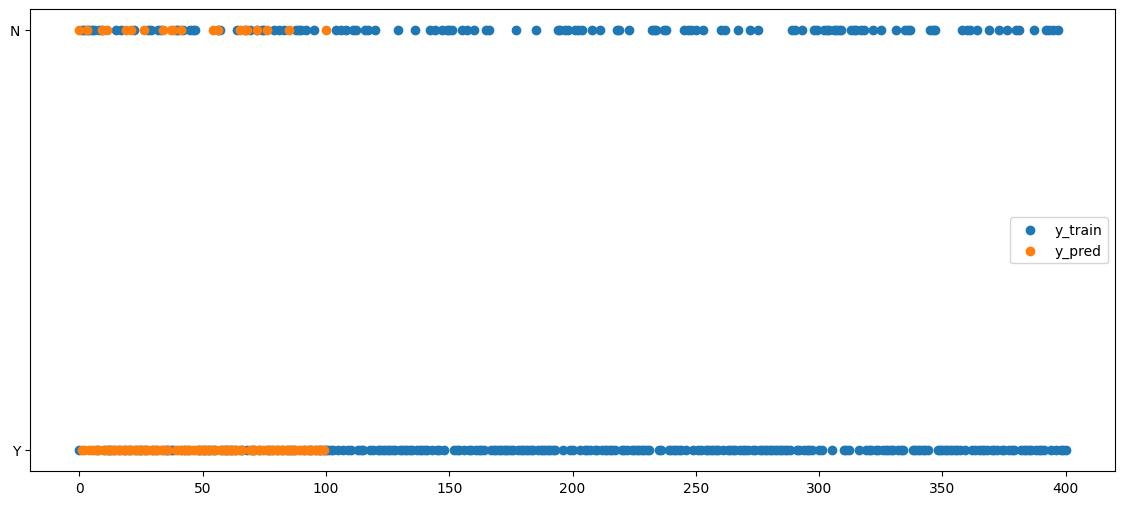

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(range(len(y_train)), y_train, label='y_train')
plt.scatter(range(len(y_pred)), y_pred, label='y_pred')
plt.legend()
plt.show()

Naive Beyes :

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()




In [ ]:
# Train the classifier using the training data
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
gnb.score(x_train ,y_train)

0.7955112219451371

In [ ]:
gnb.score(x_test , y_test)

0.7623762376237624

In [ ]:

# Make predictions on the testing data
y_pred = gnb.predict(x_test)

In [ ]:
print("Accuracy ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy  76.23762376237624 %


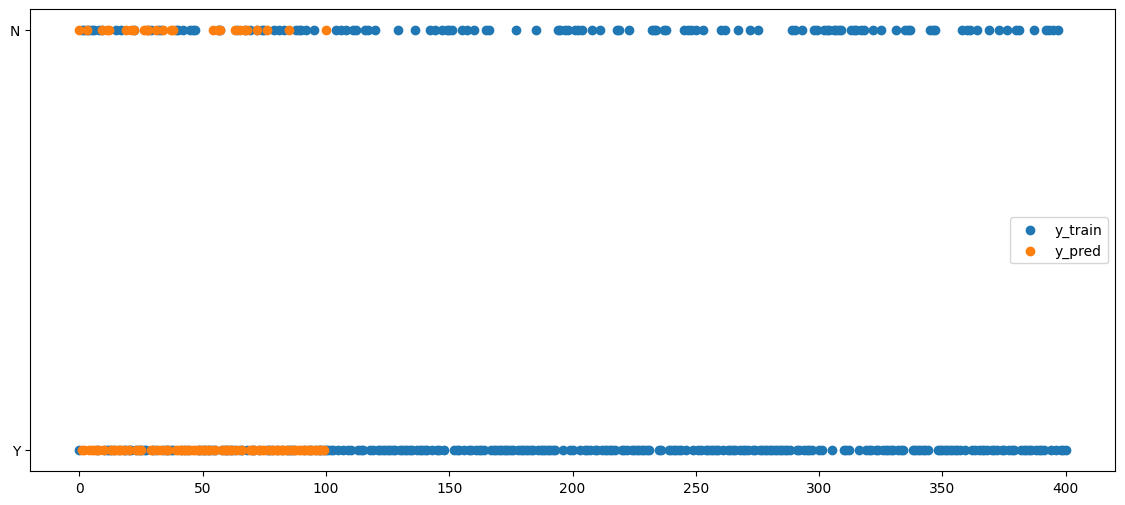

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(range(len(y_train)), y_train, label='y_train')
plt.scatter(range(len(y_pred)), y_pred, label='y_pred')
plt.legend()
plt.show()

Stacking classifier :

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=10000)
logreg_params = {'C': [0.1, 1, 10]}
nb = GaussianNB()
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [2], 'min_samples_leaf': [1, 2, 3]}
rf = RandomForestClassifier()
rf_params = {'n_estimators': [50], 'max_depth': [2]}
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7]}

# Create the list of base classifiers with the corresponding parameter grids
estimators = [
    ('logreg', GridSearchCV(logreg, logreg_params)),
    ('nb', nb),
    ('dt', GridSearchCV(dt, dt_params)),
    ('rf', GridSearchCV(rf, rf_params)),

]
# Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=10000)
)

# Train the stacking classifier using the training data
stack_clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = stack_clf.predict(x_test)
# Calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.16%


We can approve that the stacking classifier  model is the best


In [ ]:
import pickle
weeklymodel = 'best_model.sav'
pickle.dump(stack_clf, open(weeklymodel, 'wb'))